Mounted at /content/drive


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
<ipython-input-1-b3ef9f61fd2b>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiments', data=Data, palette=colors.values())  # Pass values of the colors dictionary


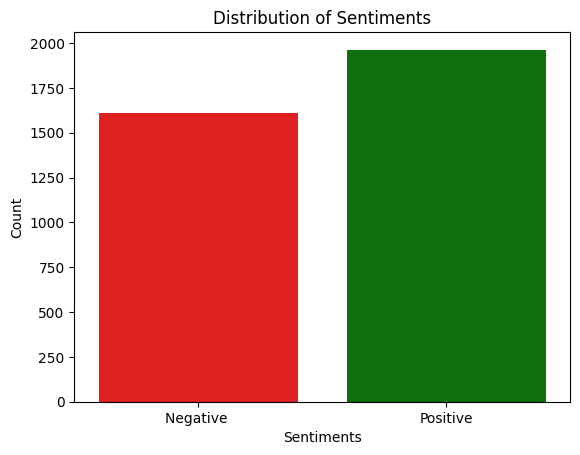

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import re
import string
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from gensim.models import Word2Vec
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense
import numpy as np
!pip install nltk
import nltk
nltk.download('punkt')
# Load the data
Data = pd.read_excel("/content/drive/MyDrive/Thesis/Product Review Sentiment Analysis.xlsx")

import seaborn as sns
import matplotlib.pyplot as plt

# Define color palette
colors = {'negative': 'red', 'positive': 'green'}

# Plot the count of sentiments with specified palette
sns.countplot(x='Sentiments', data=Data, palette=colors.values())  # Pass values of the colors dictionary

# Set labels and title
plt.xlabel('Sentiments')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')

# Show the plot
plt.show()

# Preprocessing Text
def preprocess_text(text):
    # Remove HTML tags
    text = re.sub('<[^<]+?>', '', text)
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove punctuation
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    # Remove single characters
    text = ' '.join([word for word in text.split() if len(word) > 1])
    # Remove multiple spaces
    text = re.sub(r'\s+', ' ', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove leading and trailing spaces
    text = text.strip()
    return text

Data['Reviews'] = Data['Reviews'].apply(lambda x: preprocess_text(x) if pd.notnull(x) else x)

Data['Sentiments'] = Data['Sentiments'].str.lower()

# Remove Bangla stopwords
bangla_stopwords = [
    'এই', 'সে', 'এ', 'তার', 'যে', 'আমাদের', 'তাদের', 'আমরা', 'তোমরা',
    'তুমি', 'তারা', 'যার', 'কোন', 'কিছু', 'এক', 'অনেক', 'অধিক', 'সব',
    'কত', 'কোথায়']
def remove_stopwords(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in bangla_stopwords]
    filtered_text = ' '.join(filtered_words)
    return filtered_text

Data['Cleaned_Reviews'] = Data['Reviews'].apply(remove_stopwords)
from gensim.models import Word2Vec
# Tokenization
def tokenize_text(text):
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    tokens = word_tokenize(text)
    return tokens

Data['Tokenized_Reviews'] = Data['Reviews'].apply(lambda x: tokenize_text(x) if pd.notnull(x) else x)

# Remove null values
Data = Data.dropna(subset=['Tokenized_Reviews'])


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Tokenize the reviews
Data['Tokenized_Reviews'] = Data['Reviews'].apply(tokenize_text)

# Convert tokenized reviews back to text for TF-IDF vectorization
Data['Tokenized_Text'] = Data['Tokenized_Reviews'].apply(lambda tokens: ' '.join(tokens))

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the tokenized text to obtain TF-IDF vectors
tfidf_vectors = tfidf_vectorizer.fit_transform(Data['Tokenized_Text'])



In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_vectors, Data['Sentiments'], test_size=0.2, random_state=42)

# Convert sentiments into numerical labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)


Accuracy: 0.9384615384615385
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.94       340
           1       0.95      0.93      0.94       375

    accuracy                           0.94       715
   macro avg       0.94      0.94      0.94       715
weighted avg       0.94      0.94      0.94       715

Confusion Matrix:
 [[323  17]
 [ 27 348]]


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_export.py:676: UserWarning: Glyph 2437 (\N{BENGALI LETTER A}) missing from current font.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_export.py:676: UserWarning: Matplotlib currently does not support Bengali natively.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_export.py:676: UserWarning: Glyph 2488 (\N{BENGALI LETTER SA}) missing from current font.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_export.py:676: UserWarning: Glyph 2471 (\N{BENGALI LETTER DHA}) missing from current font.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_export.py:676: UserWarning: Glyph 2472 (\N{BENGALI LETTER NA}) missing from current font.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_export.py:676: UserWar

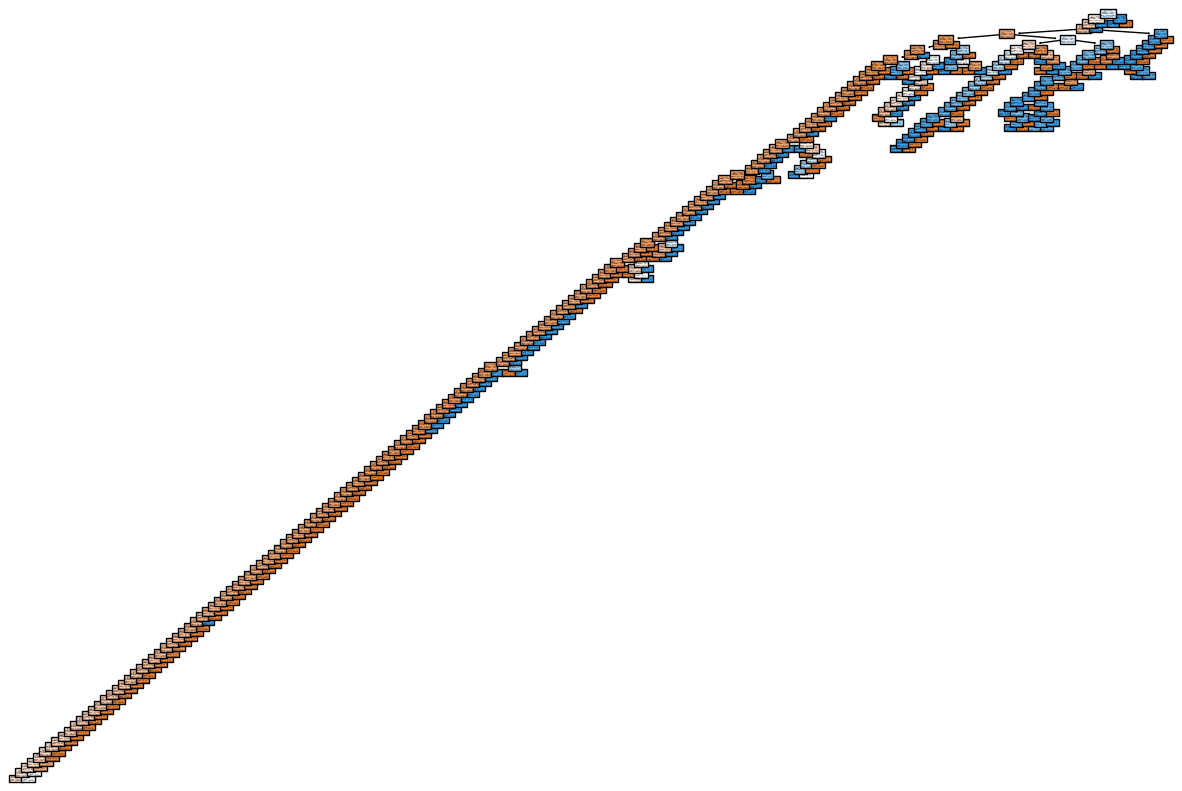

In [4]:
# prompt: generate decision tree for this

from sklearn.tree import DecisionTreeClassifier

# Instantiate the decision tree classifier
decision_tree = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Fit the model on the training data
decision_tree.fit(X_train, y_train)

# Predict on the test data
y_pred = decision_tree.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualize the decision tree
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(decision_tree, feature_names=tfidf_vectorizer.get_feature_names_out(), class_names=label_encoder.classes_, filled=True)
plt.show()


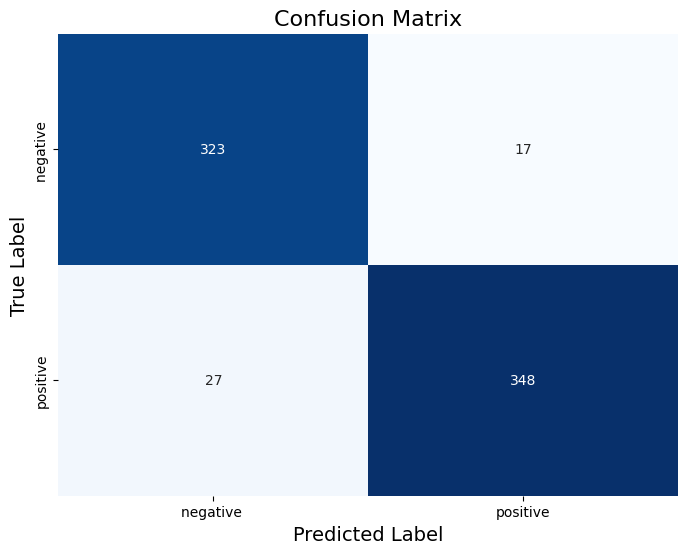

In [8]:
# prompt: display confusion matrix

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix
cm_df = pd.DataFrame(cm, columns=label_encoder.classes_, index=label_encoder.classes_)

# Set up the plot
plt.figure(figsize=(8, 6))

# Create a heatmap of the confusion matrix
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", cbar=False)

# Add labels and title
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)

# Show the plot
plt.show()


Accuracy: 0.9636363636363636
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       340
           1       0.98      0.95      0.96       375

    accuracy                           0.96       715
   macro avg       0.96      0.96      0.96       715
weighted avg       0.96      0.96      0.96       715

Confusion Matrix:
 [[333   7]
 [ 19 356]]


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_export.py:676: UserWarning: Glyph 2470 (\N{BENGALI LETTER DA}) missing from current font.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_export.py:676: UserWarning: Matplotlib currently does not support Bengali natively.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_export.py:676: UserWarning: Glyph 2472 (\N{BENGALI LETTER NA}) missing from current font.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_export.py:676: UserWarning: Glyph 2474 (\N{BENGALI LETTER PA}) missing from current font.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_export.py:676: UserWarning: Glyph 2459 (\N{BENGALI LETTER CHA}) missing from current font.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_export.py:676: UserWa

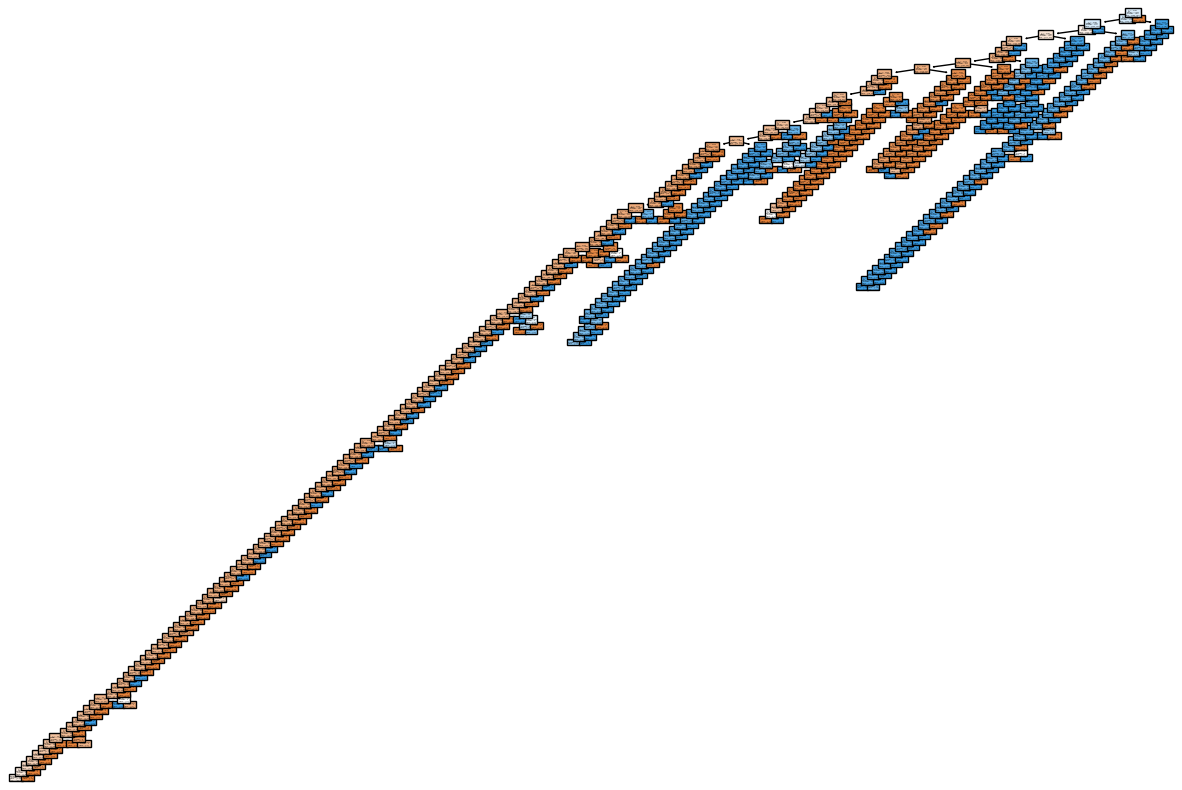

In [5]:
# prompt: generate rf for this

from sklearn.ensemble import RandomForestClassifier

# Instantiate the random forest classifier
random_forest = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)

# Fit the model on the training data
random_forest.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = random_forest.predict(X_test)

# Evaluate the model

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Visualize the random forest

plt.figure(figsize=(15, 10))
plot_tree(random_forest.estimators_[0], feature_names=tfidf_vectorizer.get_feature_names_out(), class_names=label_encoder.classes_, filled=True)
plt.show()


In [ ]:
# prompt: display confusion matrix

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix
cm_df = pd.DataFrame(cm, columns=label_encoder.classes_, index=label_encoder.classes_)

# Set up the plot
plt.figure(figsize=(8, 6))

# Create a heatmap of the confusion matrix
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", cbar=False)

# Add labels and title
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [ ]:
# prompt: classification report for this

from sklearn.metrics import classification_report

# Predict the sentiment of the test set
y_pred = model.predict([X_test.toarray(), X_test.toarray()])

# Convert the predictions to binary values
y_pred = (y_pred > 0.5).astype(int)

# Print the classification report
print(classification_report(y_test, y_pred, target_names=['negative', 'positive']))


In [ ]:
# prompt: confusion matrix for this

from sklearn.metrics import confusion_matrix

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define labels for the confusion matrix
labels = ['Negative', 'Positive']

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()
